In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [113]:
# Import Libraries
import warnings
warnings.filterwarnings('ignore')

In [114]:
from scipy.stats import skew
from scipy.stats.stats import pearsonr

In [115]:
from sklearn.datasets import load_boston
boston = load_boston()

In [166]:
boston_df = pd.DataFrame(boston.data)
# Convert index to column name using dataset feature names 
boston_df.columns = boston.feature_names
boston_df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [167]:
boston_df.shape

(506, 13)

In [168]:
boston_df['SALEPRICE'] = boston.target

In [169]:
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'SALEPRICE'],
      dtype='object')

In [170]:
boston_df.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.593761   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.596783   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.647423   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT   SALEPRICE  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

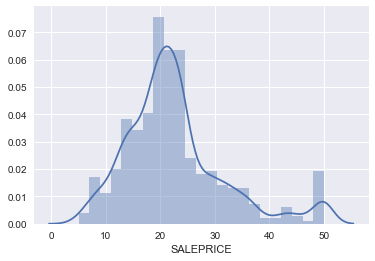

In [171]:
# Check SalePrice distribution
sns.distplot(boston_df['SALEPRICE'])

In [172]:
boston_df['SALEPRICE'].skew()

1.1080984082549072

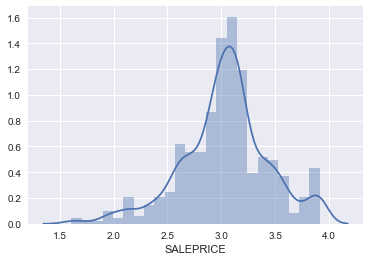

In [173]:
sns.distplot(np.log(boston_df['SALEPRICE']))

In [174]:
# Looks better when applying log
np.log(boston_df['SALEPRICE']).skew()

-0.33032129530987864

In [175]:
# Check Skew on all number fields
boston_df.select_dtypes(include = ['float64', 'int64']).skew()

CRIM         5.237578
ZN           2.225666
INDUS        0.295022
CHAS         3.405904
NOX          0.729308
RM           0.403612
AGE         -0.598963
DIS          1.011781
RAD          1.004815
TAX          0.669956
PTRATIO     -0.802325
B           -2.890374
LSTAT        0.906460
SALEPRICE    1.108098
dtype: float64

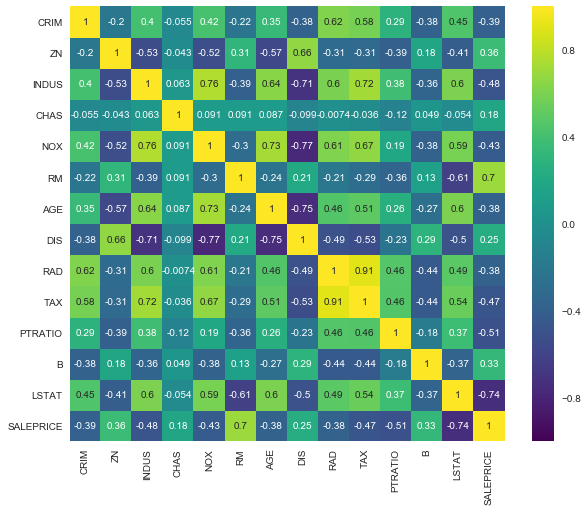

In [176]:
# Show correlation
corr = boston_df.select_dtypes(include = ['float64', 'int64']).corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, vmax=1, square=True, annot=True, cmap='viridis')

In [177]:
corr_dict = corr['SALEPRICE'].to_dict()

In [178]:
del corr_dict['SALEPRICE']

In [179]:
corr_dict

{'AGE': -0.3769545650045959,
 'B': 0.33346081965706653,
 'CHAS': 0.17526017719029749,
 'CRIM': -0.38583168988399036,
 'DIS': 0.24992873408590394,
 'INDUS': -0.48372516002837301,
 'LSTAT': -0.73766272617401429,
 'NOX': -0.4273207723732817,
 'PTRATIO': -0.50778668553756101,
 'RAD': -0.38162623063977757,
 'RM': 0.69535994707153892,
 'TAX': -0.46853593356776646,
 'ZN': 0.36044534245054471}

In [180]:
print("List the numerical features decendingly by their correlation with Sale Price:\n")
for ele in sorted(corr_dict.items(), key = lambda x: -abs(x[1])):
    print("{0}: \t{1}".format(*ele))

List the numerical features decendingly by their correlation with Sale Price:

LSTAT: 	-0.7376627261740143
RM: 	0.6953599470715389
PTRATIO: 	-0.507786685537561
INDUS: 	-0.483725160028373
TAX: 	-0.46853593356776646
NOX: 	-0.4273207723732817
CRIM: 	-0.38583168988399036
RAD: 	-0.3816262306397776
AGE: 	-0.3769545650045959
ZN: 	0.3604453424505447
B: 	0.33346081965706653
DIS: 	0.24992873408590394
CHAS: 	0.1752601771902975


SalesPrice has high Correlation coefficient with fields below:
* LSTAT     - % lower status of the population
* RM        - average number of rooms per dwelling
* PTRATIO   - pupil-teacher ratio by town
* INDUS     - proportion of non-retail business acres per town
* TAX       - full-value property-tax rate per 10000 (USD)
* NOX       - nitric oxides concentration (parts per 10 million)

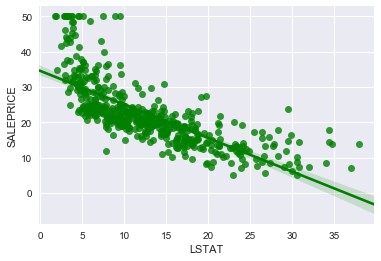

In [181]:
sns.regplot(x='LSTAT', y='SALEPRICE', data=boston_df, color='green')

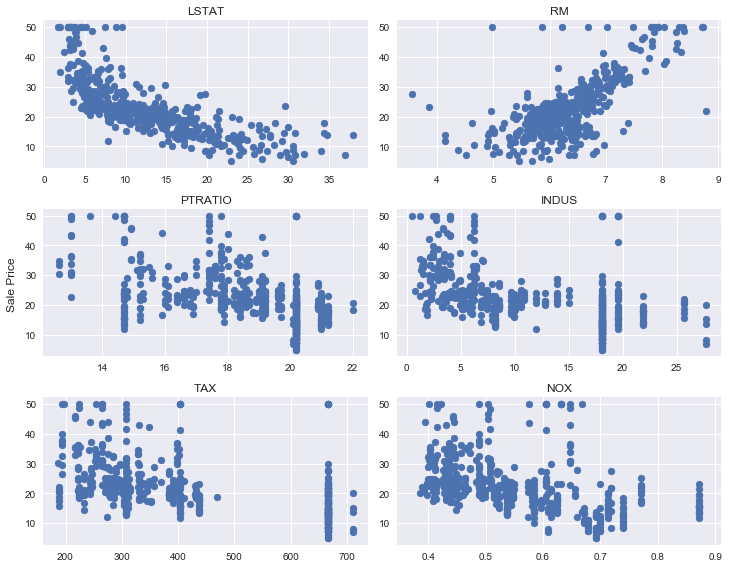

In [182]:
plt.figure(1)
f, axarr = plt.subplots(3, 2, figsize=(10, 8))
price = boston_df.SALEPRICE.values

axarr[0, 0].scatter(boston_df.LSTAT.values, price)
axarr[0, 0].set_title('LSTAT')

axarr[0, 1].scatter(boston_df.RM.values, price)
axarr[0, 1].set_title('RM')

axarr[1, 0].scatter(boston_df.PTRATIO.values, price)
axarr[1, 0].set_title('PTRATIO')

axarr[1, 1].scatter(boston_df.INDUS.values, price)
axarr[1, 1].set_title('INDUS')


axarr[2, 0].scatter(boston_df.TAX.values, price)
axarr[2, 0].set_title('TAX')


axarr[2, 1].scatter(boston_df.NOX.values, price)
axarr[2, 1].set_title('NOX')

f.text(-0.01, 0.5, 'Sale Price', va='center', rotation='vertical', fontsize = 12)
plt.tight_layout()
plt.show()

### Data preparation

In [183]:
y = np.log(boston_df.pop('SALEPRICE'))

In [184]:
# pd.get_dummies() clasify variable for regression data
all_dummy_df = pd.get_dummies(boston_df)
all_dummy_df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [185]:
all_dummy_df.shape

(506, 13)

In [186]:
all_dummy_df.isnull().sum().sort_values(ascending=False).head(10)

LSTAT      0
B          0
PTRATIO    0
TAX        0
RAD        0
DIS        0
AGE        0
RM         0
NOX        0
CHAS       0
dtype: int64

In [187]:
# Replace the missing value with an average value
mean_cols = all_dummy_df.mean()
mean_cols.head(10)

CRIM       3.593761
ZN        11.363636
INDUS     11.136779
CHAS       0.069170
NOX        0.554695
RM         6.284634
AGE       68.574901
DIS        3.795043
RAD        9.549407
TAX      408.237154
dtype: float64

In [188]:
all_dummy_df = all_dummy_df.fillna(mean_cols)

In [189]:
# For all skew greater than 0.75 are taken log (n + 1) operation
numeric_feats = all_dummy_df.dtypes[all_dummy_df.dtypes != "object"].index
skewed_feats = all_dummy_df[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index
all_dummy_df[skewed_feats] = np.log1p(all_dummy_df[skewed_feats])

In [190]:
all_dummy_df.shape

(506, 13)

In [191]:
from sklearn.model_selection import train_test_split

In [192]:
X_train, X_test, y_train, y_test = train_test_split(all_dummy_df, y, test_size=0.3, random_state=42)

## Create Model

In [193]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score

**Linear regression**

In [315]:
clf = LinearRegression()
test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
print(test_score)

[ 0.20880521  0.20450298  0.20170774  0.18876639  0.18595254  0.1829536
  0.17949223  0.1766736   0.14705405  0.26450261]


In [316]:
np.mean(test_score)

0.19404109257124807

**Ridge Regression**

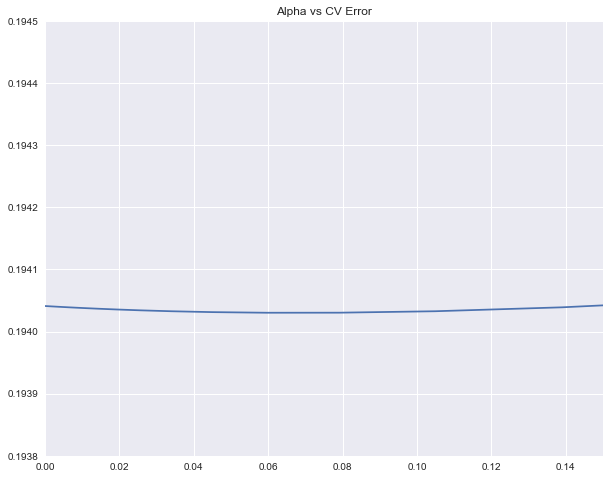

In [417]:
alphas = np.logspace(start=-6,stop=0.0001,num=50)
test_scores = []
for alpha in alphas:
    clf = Ridge(alpha)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

plt.figure(figsize=(10,8))
plt.plot(alphas, test_scores)
plt.axis([0, 0.15, 0.1938, 0.1945])
plt.title("Alpha vs CV Error");

The regression model is the best in the vicinity of Î±, and the rms error is about 0.1940

**Lasso Regression**

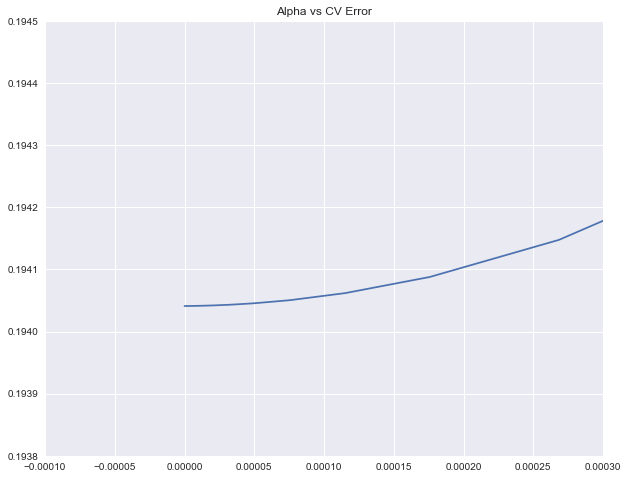

In [363]:
# Lasso Regression
alphas = np.logspace(-10, -1, 50)
test_scores = []
for alpha in alphas:
    clf = Lasso(alpha)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

plt.figure(figsize=(10,8))
plt.plot(alphas, test_scores) 
plt.axis([-0.0001, 0.0003, 0.1938, 0.1945])
plt.title("Alpha vs CV Error");

In [366]:
# Try using the best L1 and L2 parameters previously obtained
alpha = 0.1
l1_ratio = 0
clf = ElasticNet(alpha = alpha, l1_ratio=l1_ratio)
test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
np.mean(test_score)

0.21020206425029611

In [368]:
# 
from itertools import product
alphas = [0.0005, 0.001, 0.01, 0.03, 0.05, 0.1]
l1_ratios = [1.5, 1.1, 1, 0.9, 0.8, 0.7, 0.5]
cv_elastic = [np.sqrt(-cross_val_score(ElasticNet(alpha = alpha, l1_ratio=l1_ratio),
                                       X_train, y_train, cv=10, scoring='neg_mean_squared_error').mean())
             for (alpha, l1_ratio) in product(alphas, l1_ratios)]

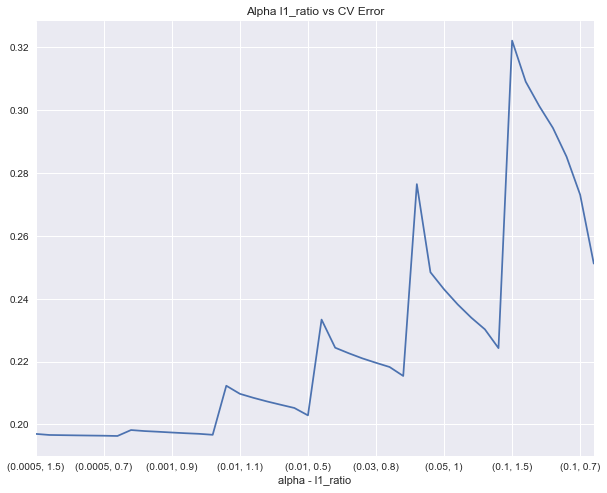

In [369]:
plt.figure(figsize=(10,8))
idx = list(product(alphas, l1_ratios))
p_cv_elastic = pd.Series(cv_elastic, index = idx)
p_cv_elastic.plot(title = "Alpha l1_ratio vs CV Error")
plt.xlabel("alpha - l1_ratio")

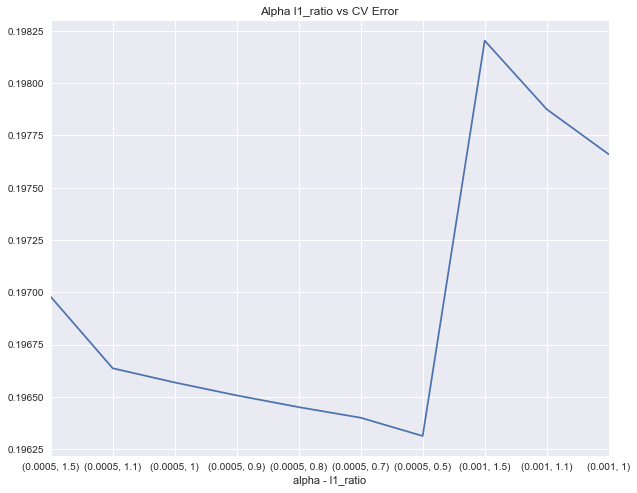

In [371]:
#Zoom in the top 10 parameter pairs
plt.figure(figsize=(10,8))
idx = list(product(alphas, l1_ratios))[:10]
p_cv_elastic = pd.Series(cv_elastic[:10], index = idx)
p_cv_elastic.plot(title = "Alpha l1_ratio vs CV Error")
plt.xlabel("alpha - l1_ratio")

When alpha is 0.0005, L1 ratio of 0.7 return the best performance with 0.19630

**Bagging**

In [372]:
bestclf1 = Lasso(0.0005)
from sklearn.ensemble import BaggingRegressor
bagged = BaggingRegressor(base_estimator=bestclf1, n_estimators=100)
np.sqrt(-cross_val_score(bagged, X_train, y_train, cv=10, scoring='neg_mean_squared_error')).mean()

0.19402210615512519

In [373]:
bestclf2 = ElasticNet(alpha = 0.0005, l1_ratio=0.7)
from sklearn.ensemble import BaggingRegressor
bagged_2 = BaggingRegressor(base_estimator=bestclf2, n_estimators=100)
np.sqrt(-cross_val_score(bagged_2, X_train, y_train, cv=10, scoring='neg_mean_squared_error')).mean()

0.19486204757558767

In [418]:
bestclf3 = Ridge(0.08)
from sklearn.ensemble import BaggingRegressor
bagged_3 = BaggingRegressor(base_estimator=bestclf3, n_estimators=100)
np.sqrt(-cross_val_score(bagged_3, X_train, y_train, cv=10, scoring='neg_mean_squared_error')).mean()

0.19377546043882005

# Predictions

In [419]:
bagged_3.fit(X_train,y_train)

BaggingRegressor(base_estimator=Ridge(alpha=0.08, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=100, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [420]:
preds = bagged_3.predict(X_test)

In [421]:
pred_df = pd.DataFrame(y_test)

In [422]:
pred_df['PREDICT'] = preds

In [423]:
pred_df['DIFF'] = pred_df['SALEPRICE'] - pred_df['PREDICT']

In [424]:
pred_df.head()

SALEPRICE   PREDICT      DIFF
173   3.161247  3.330159 -0.168912
274   3.478158  3.707251 -0.229093
491   2.610070  2.850896 -0.240827
72    3.126761  3.316129 -0.189369
452   2.778819  2.765264  0.013556

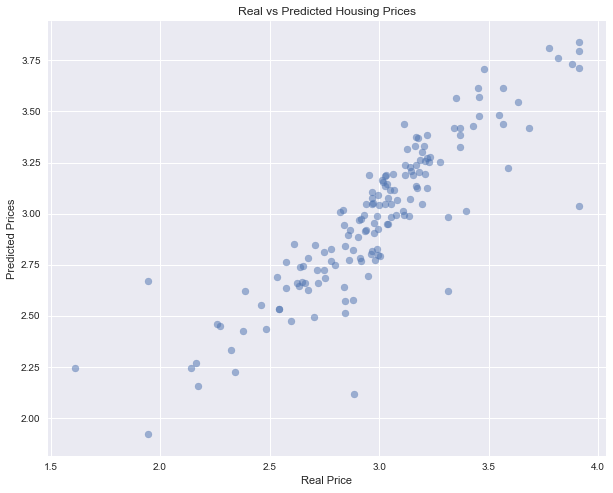

In [425]:
# Create a scatterplot of the real test values versus the predicted values.
plt.figure(figsize=(10,8))
plt.scatter(y_test, preds, alpha=0.5 )
plt.xlabel('Real Price')
plt.ylabel('Predicted Prices')
plt.title( "Real vs Predicted Housing Prices")

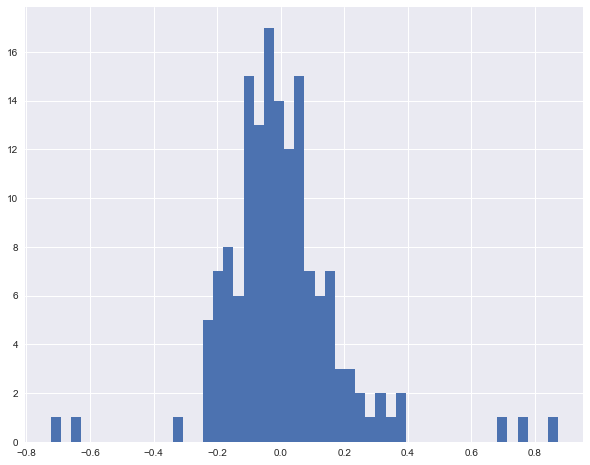

In [426]:
plt.figure(figsize=(10,8))
plt.hist((y_test-preds),bins=50);

In [427]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, preds))
print('MSE:', metrics.mean_squared_error(y_test, preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds)))

MAE: 0.126434691615
MSE: 0.0354244555807
RMSE: 0.188213855974


**Wowww it's a great improvement on our Predictions** 

From our previous algorithm 
- MAE: 3.16560523149 
- MSE: 21.5402189439 
- RMSE: 4.64114414169 